<a href="https://colab.research.google.com/github/yrb1802/Yes_Bank_Stock_closing_price_prediction_ML/blob/main/Yes_Bank_Stock_closing_price_prediction_ML_Yashraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Yes Bank Stock closing price prediction**


##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            -Yashraj Belchandan

# **Project Summary -**


Yes Bank is a prominent bank in India, offering a broad spectrum of services and solutions including bank accounts, deposits, cards, cash management, privilege banking, trade finance, Non-Resident India (NRI) banking, institutional banking, merchant acquiring, digital banking, and agricultural banking solutions. Given that this project's focus is on stock price data, I will analyze the dataset's patterns through exploratory data analysis (EDA) and build a machine learning model to predict the closing stock price.

The data analysis and model development are performed using Python library packages, including Numpy and Pandas for data manipulation, Matplotlib and Seaborn for data visualization, and machine learning algorithms such as Linear Regression, Lasso, Ridge, ElasticNet, along with scaling techniques like MinMaxScaler.










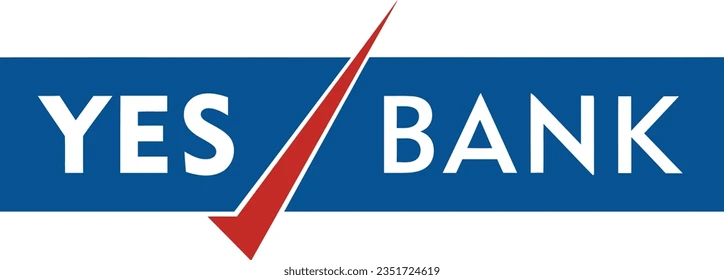

# **GitHub Link -**

# **Problem Statement**



The dataset provided includes stock price data organized by monthly dates, with five key columns: date, open, high, low, and closing price. Our objective is to predict the closing price column, which serves as the target variable for our analysis. We will start by conducting exploratory data analysis (EDA) to uncover patterns, examine relationships among the different columns, and their connection with the target variable. Subsequently, we will develop a predictive model aimed at estimating the closing price with reasonable accuracy.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [128]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import (Lasso, Ridge, ElasticNet)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import (mean_squared_error, mean_absolute_percentage_error, mean_absolute_error)
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [129]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Dataset First View

In [130]:
# Dataset First Look

YB_df=pd.read_csv("/content/drive/MyDrive/Almabetter Projects/Machine Learning/Datasets/data_YesBank_StockPrices.csv")

YB_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [131]:
YB_df.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [132]:
YB_df.sample(5)

,Date,Open,High,Low,Close
176,Mar-20,35.2,87.95,5.55,22.45
7,Feb-06,15.5,16.97,15.40,16.12
14,Sep-06,18.0,18.88,16.80,18.46
21,Apr-07,27.0,31.99,26.20,30.31
77,Dec-11,57.0,59.80,47.40,47.72


### Dataset Rows & Columns count

In [133]:
# Dataset Rows & Columns count
YB_df.shape

(185, 5)

In [134]:
number_of_rows=YB_df.shape[0]

In [135]:
number_of_rows

185

In [136]:
number_of_columns=YB_df.shape[1]

In [137]:
number_of_columns

5

### Dataset Information

In [138]:
# Dataset Info
YB_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [139]:
# Dataset Duplicate Value Count
YB_df.duplicated().sum()

0

#### Missing Values/Null Values

In [140]:
# Missing Values/Null Values Count
YB_df.isnull().sum().sum()

0

**So there are no missing values in the data set**

### What did you know about your dataset?


The dataset consists of 185 rows and 5 columns, with various variable types. There are no missing or duplicate values within the dataset. It contains two types of data: float and object. Essentially, this dataset offers an overview of stock price information. By generating insights from this data, we aim to explore the relationships between the target variable (Closing Price) and the independent variables, which are the other four columns. Following this analysis, we will build machine learning models to predict or estimate future closing prices.

## ***2. Understanding Your Variables***

In [142]:
# Dataset Columns
YB_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [143]:
# Dataset Describe
YB_df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

The name of the individual varriables mentioned in the columns of the data set and the descriptions of them are listed below:

⦁ Date: Month and day information on which the information was recorded.(Categorical)

⦁ Open : Opening stock price.(Numeric)

⦁ High : Highest Stock price.(Numeric)

⦁ Low : Lowest Stock Price.(Numeric)

⦁ Close : Closing Stock Price.(Numeric)


### Check Unique Values for each variable.

In [144]:
# Check Unique Values for each variable.
for items in YB_df.columns.tolist():
  print('The number of uniques values in column',items,'is', YB_df[items].nunique())

The number of uniques values in column Date is 185
The number of uniques values in column Open is 183
The number of uniques values in column High is 184
The number of uniques values in column Low is 183
The number of uniques values in column Close is 185


In [145]:
YB_df['High'].unique()

array([ 14.  ,  14.88,  14.87,  14.47,  13.88,  14.44,  17.16,  16.97,
        20.95,  20.8 ,  21.8 ,  18.4 ,  17.2 ,  18.6 ,  18.88,  24.2 ,
        28.47,  29.66,  34.16,  32.6 ,  31.58,  31.99,  36.14,  36.38,
        41.04,  39.  ,  41.75,  47.3 ,  50.98,  54.  ,  55.56,  53.97,
        48.9 ,  35.8 ,  36.88,  32.22,  30.5 ,  28.98,  29.8 ,  25.  ,
        17.8 ,  16.56,  18.34,  12.5 ,  11.24,  17.51,  28.84,  31.08,
        33.16,  35.18,  41.3 ,  52.34,  54.98,  55.67,  57.58,  51.48,
        52.06,  59.48,  58.08,  59.9 ,  60.94,  68.88,  71.74,  76.  ,
        77.6 ,  68.36,  63.54,  57.69,  65.2 ,  68.26,  61.68,  63.39,
        68.  ,  63.96,  60.08,  64.8 ,  63.7 ,  59.8 ,  66.5 ,  74.8 ,
        77.88,  76.1 ,  70.59,  70.6 ,  73.19,  74.78,  77.69,  84.2 ,
        89.6 ,  95.  , 107.  , 107.8 , 100.15, 101.8 , 109.43, 102.94,
       100.4 ,  67.81,  78.94,  76.44,  77.27,  83.  ,  76.35,  62.7 ,
        83.36,  94.98, 117.6 , 117.57, 114.46, 118.69, 126.85, 137.8 ,
      

In [146]:
YB_df['Open'].unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

## 3. ***Data Wrangling***

### Data Wrangling Code

In [147]:
YBC_df = YB_df.copy()

In [148]:
YBC_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [149]:
# Write your code to make your dataset analysis ready.
YBC_df['Date']= pd.to_datetime(YBC_df['Date'].apply(lambda x:datetime.strptime(x, '%b-%y')))

In [150]:
YBC_df.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


### What all manipulations have you done and insights you found?


The dataset contains no missing or null values, and there are no duplicate entries, as verified earlier. Since the 'Date' column was not initially in a proper format, I have reformatted it to Year-Month-Date, which will facilitate better data visualization and analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

#### **Univariate Analysis**

<Axes: xlabel='Close', ylabel='Density'>

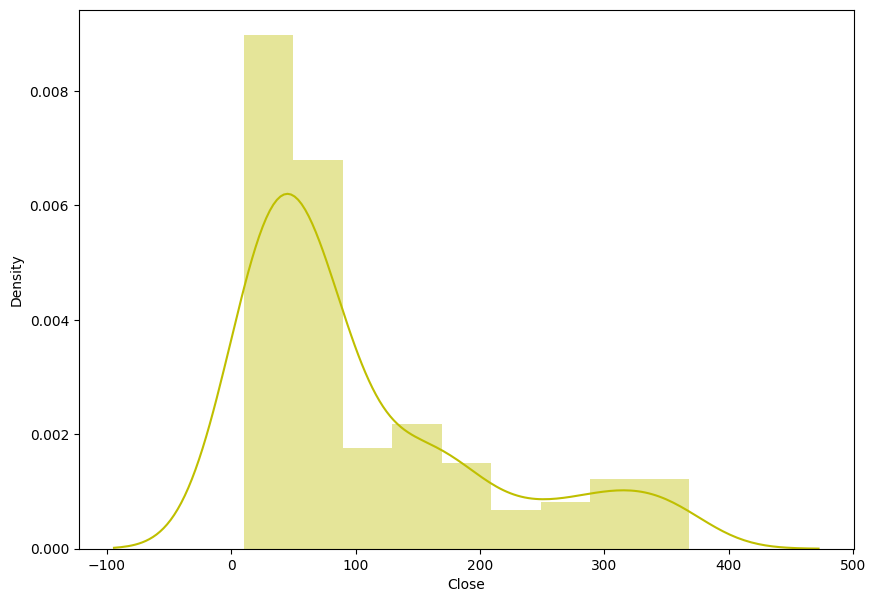

In [151]:
# Chart - 1 visualization code
# Dependent variable 'Price'
plt.figure(figsize=(10,7))
sns.distplot(YBC_df['Close'],color="y")

##### 1. Why did you pick the specific chart?

To see the distribution of Closing price in the dataset I have used the dist plot as with the help of dist plot I will be able to check the skewness of the data and according to that data will be transformed to handle the skewness.

##### 2. What is/are the insight(s) found from the chart?

The above chart shows that the 'Close' columnm data is possitively skewed. So I have to transform this column data to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of the 'Close' column that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 2

In [152]:
numeric_features = YBC_df.describe().columns

In [153]:
numeric_features

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [154]:
# Chart - 2 visualization code

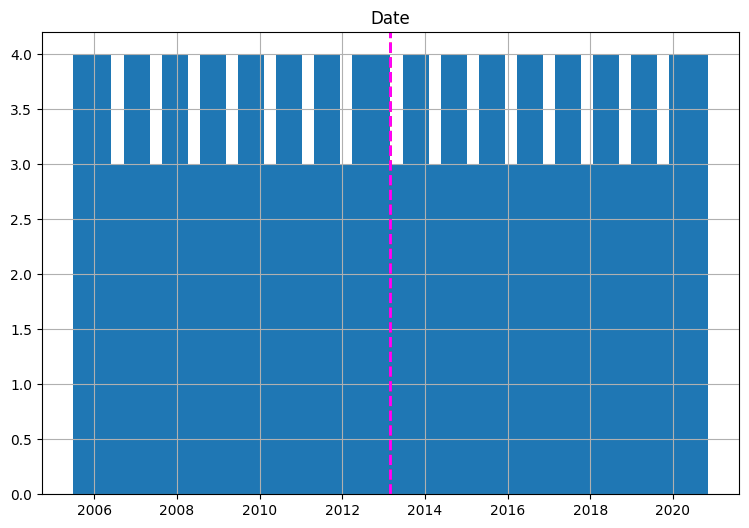

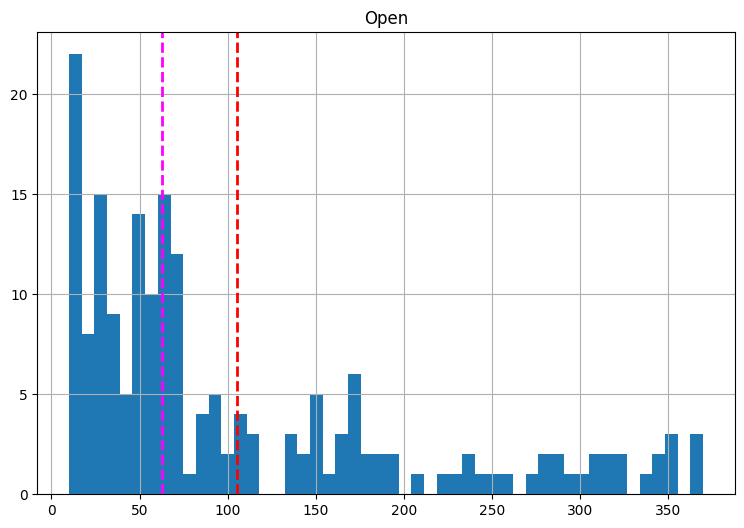

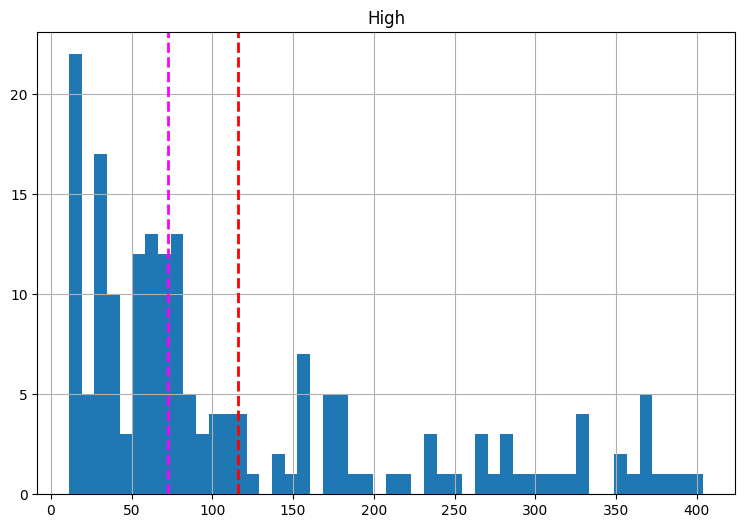

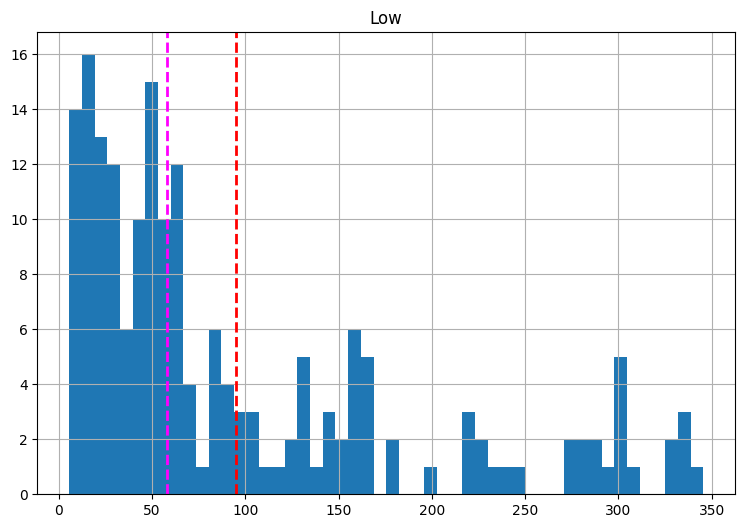

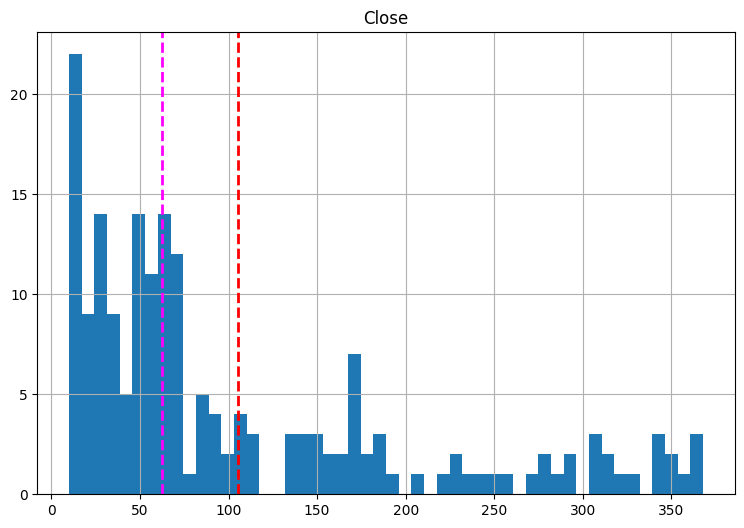

In [155]:
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = YBC_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

As histogram is a very popular tool so the chart will show the overview of each and every varriables information and gives a clear idea about the data set. It also sumarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that all the numeric variables are possitively skewed. So I have to transform these column datas to log scale data for handling the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gain insight shows the posstive skewed distribution of all the numeric columns that will help me to understand and the methods to be applied to tackle the skewness of the data.

#### Chart - 3

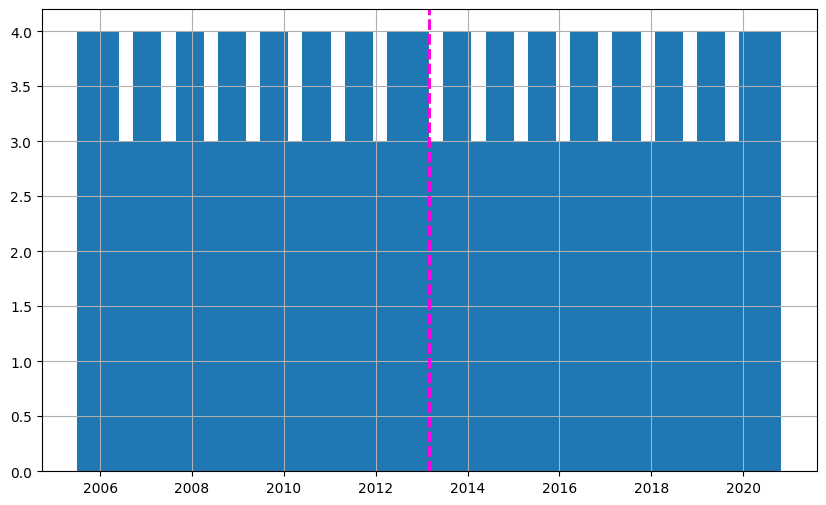

In [156]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
feature = YBC_df['Date']
feature.hist(bins=50, ax = ax)
ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

##### 1. Why did you pick the specific chart?

To see the distribution of 'Date' column which is a categorical in the dataset I have used the dist plot .

##### 2. What is/are the insight(s) found from the chart?

As the Date column is categorical information and from the distogram plot it is clear that the date column is equally distributed.

#### Chart - 4

**Bivariate Analysis**

In [157]:
# Chart - 4 visualization code
ax=px.line(YBC_df,YBC_df['Date'],YBC_df['Close'],title='Monthly Closing Price')
ax.update_layout(xaxis=dict(title='year'),yaxis=dict(title='Closing Price'))
ax.show()

##### 1. Why did you pick the specific chart?

As I am doing bivariate analysis. Therefore the above line plot shows the relationship between the 'Date' column and the closing price.

##### 2. What is/are the insight(s) found from the chart?


The chart above shows a consistent overall growth in the stock price until 2014, with some fluctuations. However, after 2014, the stock price experienced a significant rise, and between 2016 and 2018, the growth was particularly impressive, with the price occasionally surpassing 350. In 2020, there was a sharp decline in stock prices, likely due to the fraud case involving one of the bank's founders, which is widely known.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes the gained insight is showing the overall trends of the stock price throughout the year. By just seeing the trend we can have an idea as when to invest for buying yes bank shares.

#### Chart - 5

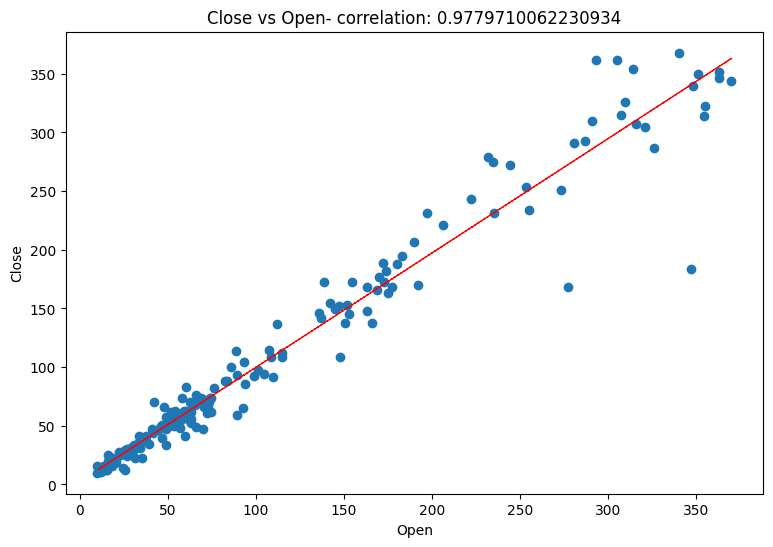

In [158]:
# Chart - 5 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['Open']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Open')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Open' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['Open'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['Open'])

plt.plot(YBC_df['Open'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Open and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the Open and Close data are Highly correlated therefore we can say that the closing price is very much dependant upon the Opening price of the stock

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Open and Price indicates that Opening price will alway plays an important role to have an idea about closing price.

#### Chart - 6

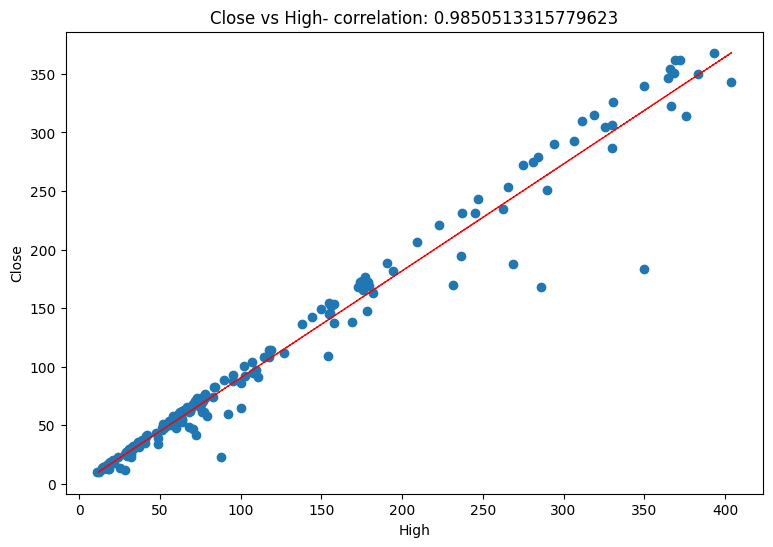

In [159]:
# Chart - 6 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['High']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('High')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'High' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['High'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['High'])

plt.plot(YBC_df['High'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the High and Close.

##### 2. What is/are the insight(s) found from the chart?

As we can see that the High and Close data are Highly correlated therefore we can say that the closing price is also very much dependant on the High price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the High and Price indicates that High price will always play an important role to have an idea about closing price.

#### Chart - 7

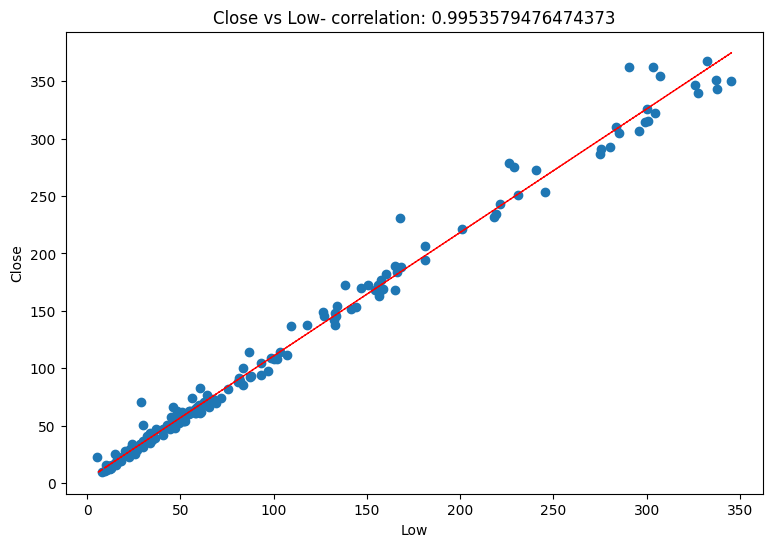

In [160]:
# Chart - 7 visualization code
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = YBC_df['Low']
label = YBC_df['Close']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Low')
plt.ylabel('Close')
ax.set_title('Close vs ' + 'Low' + '- correlation: ' + str(correlation))
z = np.polyfit(YBC_df['Low'], YBC_df['Close'], 1)
y_hat = np.poly1d(z)(YBC_df['Low'])

plt.plot(YBC_df['Low'], y_hat, "r--", lw=1)

plt.show()

##### 1. Why did you pick the specific chart?

The above scatter plot shows the relation between the Low and Close.

##### 2. What is/are the insight(s) found from the chart?

Also we can see that the Low and Close data are also Highly correlated therefore we can say that the closing price is also very much dependant on the Low price of the stock.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. The high correlation between the Low and Price indicates that Low price will also play an important role to have an idea about closing price.

#### Chart - 8 - Correlation Heatmap

<Axes: >

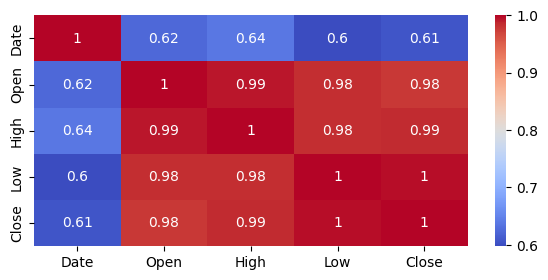

In [161]:
# Correlation Heatmap visualization code
plt.figure(figsize=(7,3))
sns.heatmap(YBC_df.corr(),annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

Therefore, to show the relations between the varriables we have used this plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can se that each and every feature here is highly correlated to each other. As the linear Regression assumes that there is no multicolinearity therefore we will try to reduce the multicolinearity using transformation of variables and generating new features.

#### Chart - 9 - Pair Plot

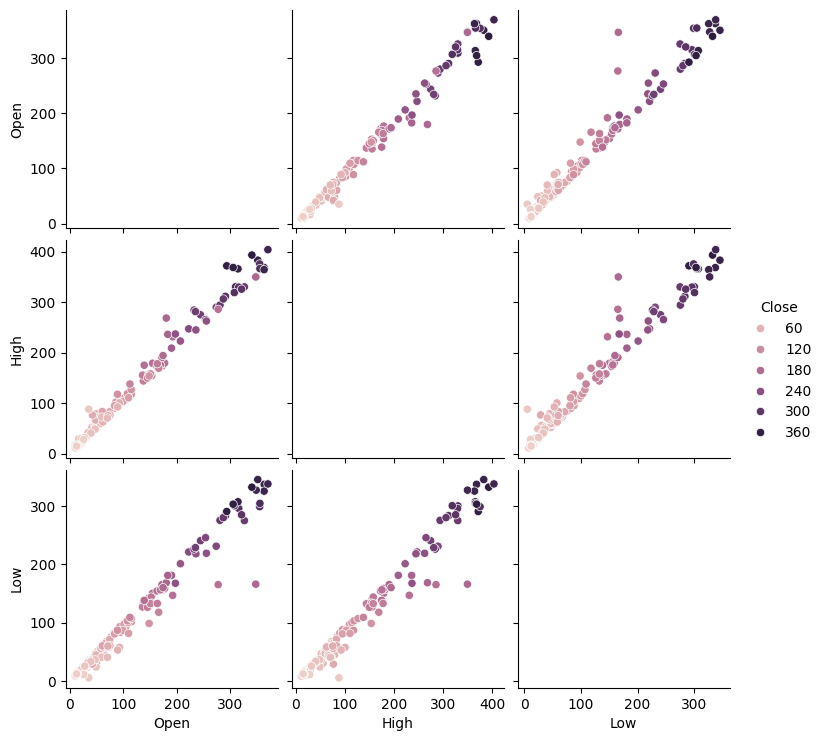

In [162]:
# Pair Plot visualization code
sns.pairplot(YBC_df,hue="Close")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

As I have used Close in the hue variable so the above plot will show the distribution of Close with the different type of columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Threr are no missing values and null values in the dataset

### 2. Handling Outliers

In [163]:
# Handling Outliers & Outlier treatments
fig=px.box(YBC_df['Open'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [164]:
fig=px.box(np.log10(YBC_df['Open']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [165]:
fig=px.box(YBC_df['High'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [166]:
fig=px.box(np.log10(YBC_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [167]:
fig=px.box(YBC_df['Low'])
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

In [168]:
fig=px.box(np.log10(YBC_df['High']),title='applied log10')
fig.update_layout(xaxis=dict(title='Boxplot'))
fig.show()

<Axes: xlabel='Close', ylabel='Density'>

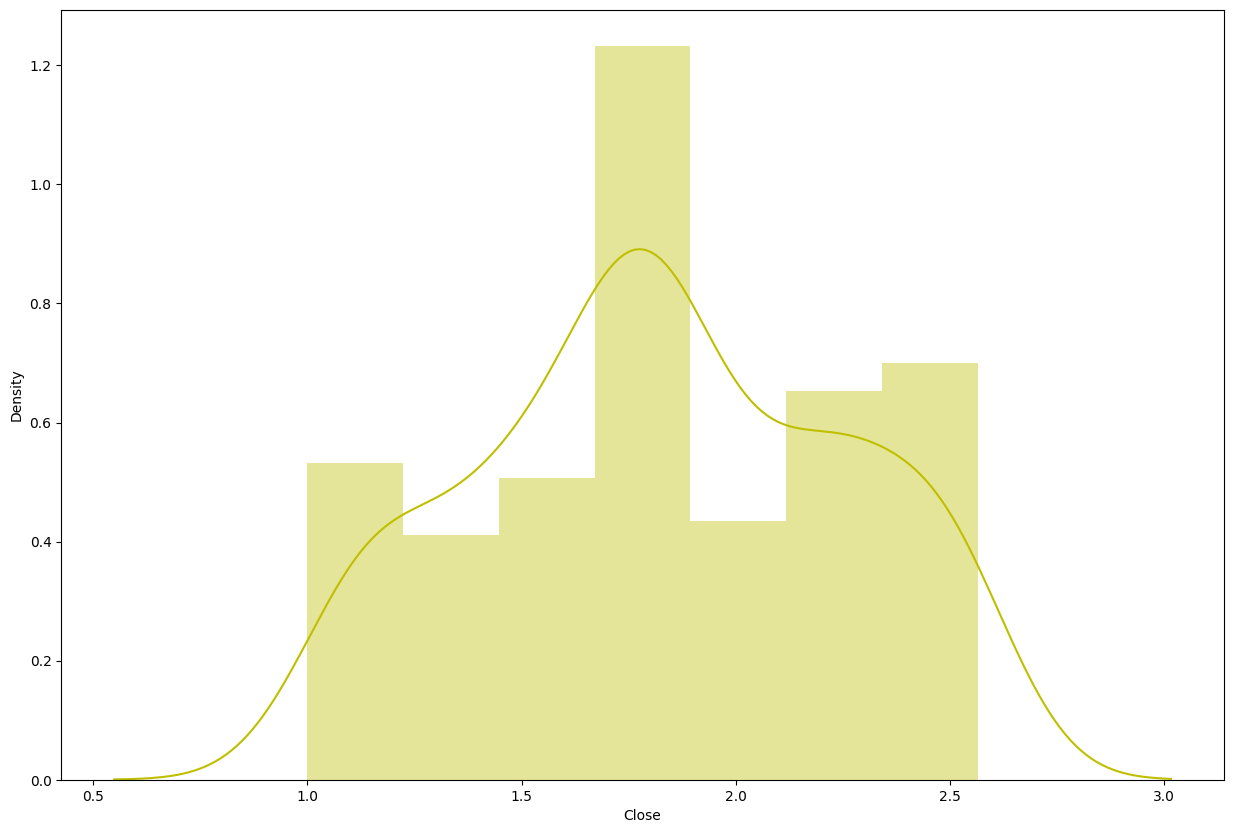

In [169]:
# Dependent variable 'Price'
plt.figure(figsize=(15,10))
sns.distplot(np.log10(YBC_df['Close']),color="y")

In [170]:
YBC_df.set_index('Date' , inplace=True)

In [171]:
#Generating a new feature to tackle the high multicolinearity.
YBC_df['average'] = YBC_df[['Open', 'High', 'Low']].mean(axis=1).round(2)

In [172]:
YBC_df.head(10)

,Open,High,Low,Close,average
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.75
2005-08-01,12.58,14.88,12.55,13.42,13.34
2005-09-01,13.48,14.87,12.27,13.30,13.54
2005-10-01,13.20,14.47,12.40,12.99,13.36
2005-11-01,13.35,13.88,12.88,13.41,13.37
2005-12-01,13.49,14.44,13.00,13.71,13.64
2006-01-01,13.68,17.16,13.58,15.33,14.81
2006-02-01,15.50,16.97,15.40,16.12,15.96
2006-03-01,16.20,20.95,16.02,20.08,17.72


In [173]:
dependant_variable='Close'

In [174]:
Independant_variable=list(set(YBC_df.columns.tolist())-{dependant_variable})

In [175]:
x= np.log10(YBC_df[Independant_variable]).values

In [176]:
y=np.log10(YBC_df[dependant_variable]).values

##### What all outlier treatment techniques have you used and why did you use those techniques?

Three independent features displayed outliers, as highlighted in the box plot. To address these outliers and manage data skewness, I transformed all numeric features using a base-10 logarithmic scale.

After transforming the numeric features, I visualized them again using a box plot, which confirmed the absence of outliers. Additionally, the distribution of the price column appeared to approximate a normal distribution after the transformation.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [177]:
# Manipulate Features to minimize feature correlation and create new features
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [178]:
calc_vif(YBC_df[[i for i in YBC_df.describe().columns]])

,variables,VIF
0,Open,3.341628e+08
1,High,3.960572e+08
2,Low,2.770299e+08
3,Close,4.284194e+02
4,average,2.993476e+09


### 5. Data Transformation

In [179]:
# Transform Your data
x= np.log10(YBC_df[Independant_variable]).values
y=np.log10(YBC_df[dependant_variable]).values

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?


Yes, transforming the data was necessary. It was observed that all the independent variables and the target variable were positively skewed and contained outliers. To address both issues, I applied a
log⁡10
  transformation, which effectively reduced skewness and minimized the impact of outliers

**6. Data Splitting**

In [180]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


##### What data splitting ratio have you used and why?

Here I have used the most common or standard spliting of the dataset which is 80/20. 80% of the dataset is to train the algorithm and 20% is for test.

### 6. Data Scaling

In [181]:
# Scaling your data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

##### Which method have you used to scale you data and why?

Here I have used minmaxscaler method to scale the data since all the independent variables are not normally distributed. so to make sure every independent variables contribute almost equally to the analysis the minmaxscaler method is used.

## ***7. ML Model Implementation***

### ML Model - 1
**Linear Regression**

In [182]:
# ML Model - 1 Implementation
regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(x_train, y_train)

LinearRegression()

In [183]:
regressor.intercept_

0.9797572199457666

In [184]:
regressor.coef_

array([ 0.90459122,  1.8295131 , -1.46550815,  0.31613169])

In [185]:
y_pred_train = regressor.predict(x_train)
#predicting the test results
y_pred = regressor.predict(x_test)

In [186]:
y_train

array([2.18912521, 1.30276371, 1.81130684, 1.61752453, 1.18892848,
       1.75966784, 1.70731463, 1.57898284, 1.70363524, 1.07736791,
       1.9330315 , 1.11892575, 1.53844805, 1.45682135, 2.51340407,
       1.86605092, 2.54955498, 1.4034637 , 1.67495295, 1.7363965 ,
       2.50819293, 1.08849047, 2.05648559, 1.52517443, 2.0581602 ,
       1.77451697, 2.53932706, 1.83142182, 1.98896007, 2.16411482,
       1.63828954, 1.96773513, 2.03494915, 2.17429246, 1.15745677,
       2.00121433, 1.84695533, 1.12385164, 1.73102438, 1.86934908,
       2.27584094, 1.01114736, 1.25599573, 2.0187421 , 1.7451529 ,
       1.42894429, 2.03622954, 2.24679392, 2.13618133, 1.68708284,
       2.54406804, 1.44638181, 1.61267792, 2.18132899, 1.96473092,
       1.78682238, 2.31468865, 1.17695898, 1.7854722 , 1.52439612,
       1.50419892, 1.81934648, 1.25139485, 2.46323583, 1.55606116,
       1.16643011, 2.13956427, 1.44932409, 1.35755372, 1.81947813,
       1.91750551, 1.70389295, 1.86770313, 1.73631681, 1.11360

In [187]:
#predicted closing price on the test data set
y_pred

array([1.4923911 , 2.14805936, 1.66188379, 2.14969445, 1.82574095,
       1.50808261, 2.36594461, 1.2267379 , 1.14805807, 2.34435985,
       2.47726939, 1.94425469, 2.18459158, 1.76981107, 2.53179597,
       2.42427508, 1.86780302, 1.44681118, 2.42593087, 1.70693503,
       0.96961156, 2.07433412, 2.17187189, 1.77411331, 2.33861575,
       1.69564443, 2.40140144, 1.13603302, 2.03325749, 1.72217345,
       2.57000081, 2.54424413, 1.86850165, 2.22427412, 1.59443763,
       1.6805872 , 2.41726416])

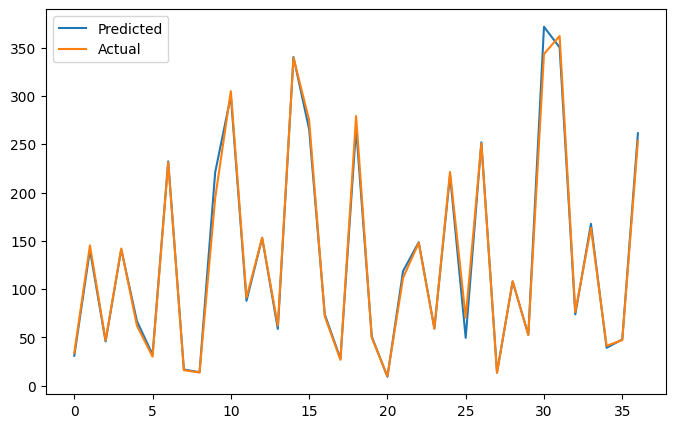

In [188]:
# now we will visualize the comparison between actual values and predicted values of the target variable.
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [189]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [190]:
# Visualizing evaluation Metric Score chart
Lr_MSE=mean_squared_error(10**(y_test), 10**(y_pred))
Lr_MSE

69.92976518274932

In [191]:
mse_train=mean_squared_error(10**(y_train), 10**(y_pred_train))

In [192]:
mse_train

44.40573158904323

In [193]:
# Train performance
rmse_train=np.sqrt(mse_train)

In [194]:
rmse_train

6.663762569978258

In [195]:
# Test performance
Lr_RMSE = np.sqrt(Lr_MSE)
Lr_RMSE

8.362401878811452

In [196]:
Lr_MAE=mean_absolute_error(10**(y_test), 10**(y_pred))

In [197]:
Lr_MAE

4.746993623525008

In [198]:
mean_absolute_percentage_error(10**(y_train), 10**(y_pred_train))

0.04709625503648751

In [199]:
Lr_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred))
Lr_MAPE

0.041509723767066284

In [200]:
r2_score(y_train, y_pred_train)

0.9951721981228238

In [201]:
#Test performance
Lr_R2_score=r2_score(y_test, y_pred)
Lr_R2_score

0.9946673148333343

In [202]:
Matrics_score=pd.DataFrame({'mean squared error':[Lr_MSE],'root mean squared error':[Lr_RMSE],'mean absolute error':[Lr_MAE], 'mean absolute percentage error':[Lr_MAPE], 'r2_score':[Lr_R2_score],})

In [203]:
Matrics_score

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2_score
0,69.929765,8.362402,4.746994,0.04151,0.994667


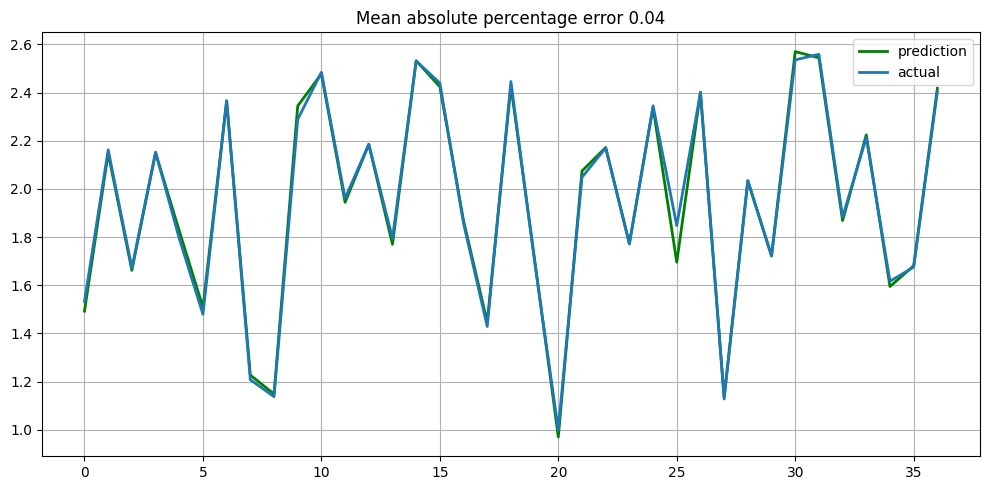

In [204]:
# function to plot model performance
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(Lr_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(regressor, plot_intervals=True)

### ML Model - 2
**Ridge Regression with cross validation**

In [205]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [206]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0011773450928997864


In [207]:
y_pred_ridge = ridge_regressor.predict(x_test)

In [208]:
y_pred_ridge

array([1.49497405, 2.14885571, 1.67959522, 2.14515702, 1.82041642,
       1.5033444 , 2.36409877, 1.21975906, 1.14268177, 2.34060261,
       2.4776548 , 1.95289768, 2.18105758, 1.76853582, 2.52868016,
       2.42119101, 1.86349297, 1.44148176, 2.42297031, 1.70850826,
       0.97356231, 2.07243188, 2.17737697, 1.76868982, 2.33427424,
       1.69801724, 2.40504124, 1.12999633, 2.03120817, 1.72809578,
       2.56998041, 2.54062498, 1.86455564, 2.22417362, 1.59142813,
       1.67901578, 2.41282407])

In [209]:
y_test

array([1.53224464, 2.16205634, 1.6716356 , 2.15253295, 1.79393001,
       1.47943134, 2.36410052, 1.20736504, 1.13703745, 2.2884728 ,
       2.48415742, 1.96047078, 2.18554215, 1.79504537, 2.53096768,
       2.43941165, 1.85648721, 1.42862067, 2.44575984, 1.69757803,
       0.99913054, 2.04805317, 2.17011497, 1.7707784 , 2.34498141,
       1.847881  , 2.39941411, 1.12742878, 2.0342674 , 1.72090317,
       2.53580029, 2.55866058, 1.88332068, 2.21301278, 1.61658053,
       1.67504474, 2.40401223])

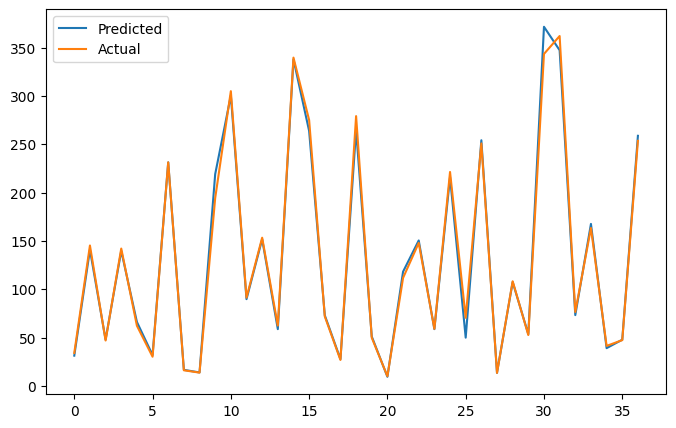

In [210]:
#now we will visualize the comparison between actual values and predicted values of the target variable.
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_ridge))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [211]:
R_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_ridge))
print("MSE :" , R_MSE)


MSE : 70.90780796564454


In [212]:
R_RMSE = np.sqrt(R_MSE)
print("RMSE :" ,R_RMSE)

RMSE : 8.420677405389933


In [213]:
R_r2 = r2_score(10**(y_test), 10**(y_pred_ridge))
R_r2

0.9937003889249277

In [214]:
R_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_ridge))
R_MAE

4.931169409078715

In [215]:
R_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_ridge))
R_MAPE

0.03999348984784945

In [216]:
# Visualizing evaluation Metric Score chart
Matrics_score_ridge=pd.DataFrame({'mean squared error':[R_MSE],'root mean squared error':[R_RMSE],'mean absolute error':[R_MAE], 'mean absolute percentage error':[R_MAPE], 'r2_score':[R_r2],})

In [217]:
Matrics_score_ridge

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2_score
0,70.907808,8.420677,4.931169,0.039993,0.9937


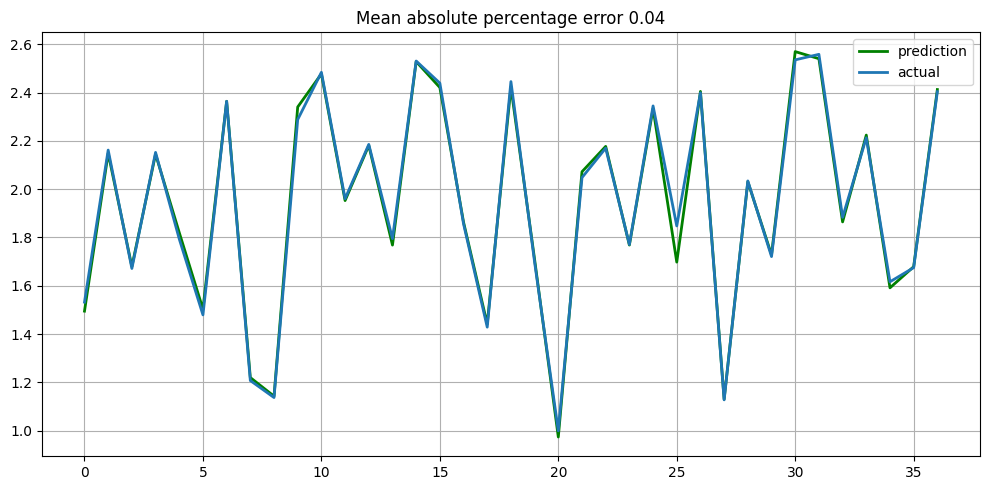

In [218]:
# function to plot model performance
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(R_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(ridge_regressor, plot_intervals=True)

In [219]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_ridge), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

### ML Model - 3
**lASSO Regression with cross validation**

In [220]:
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(x_train, y_train)

Lasso(alpha=0.1, max_iter=3000)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [221]:
# Visualizing evaluation Metric Score chart
lasso.score(x_train, y_train)

0.24239155193667772

In [222]:
y_pred_l = lasso.predict(x_test)

In [223]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_l))
print("MAPE :" ,MAPE)

r2 = r2_score(10**(y_test), 10**(y_pred_l))
print("R2 :" ,r2)

MSE : 14034.988948250462
MAE : 82.57480570251505
RMSE : 118.46935868928497
MAPE : 0.7547254629560559
R2 : -0.24690036758368716


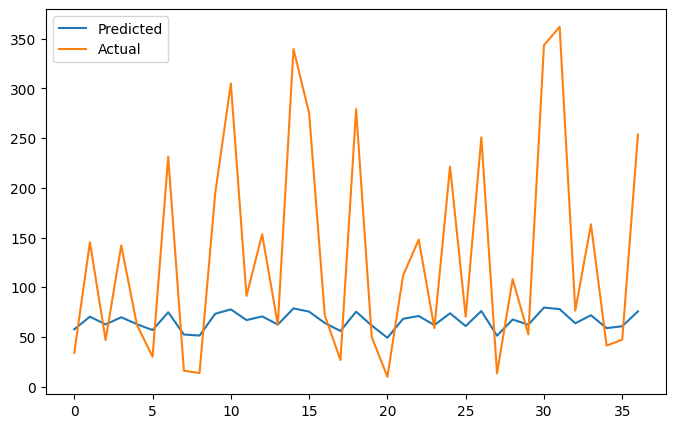

In [224]:
# function to plot model performance
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_l))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [226]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.0013598109095847753


In [227]:
y_pred_lasso = lasso_regressor.predict(x_test)

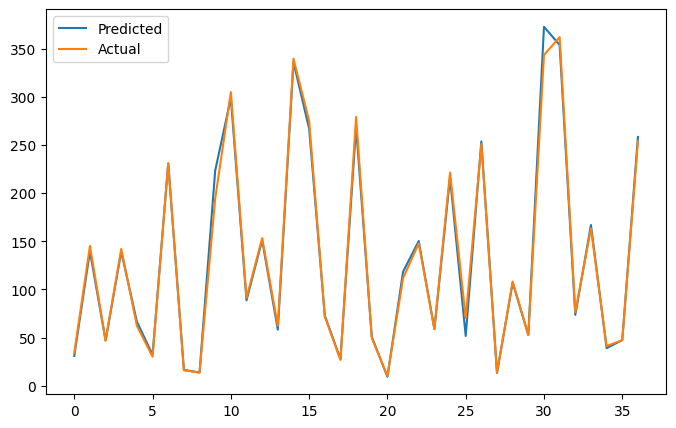

In [228]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_lasso))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [229]:
L_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_lasso))
print("MSE :" , L_MSE)

L_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_lasso))
print("MAE :" ,L_MAE)

L_RMSE = np.sqrt(L_MSE)
print("RMSE :" ,L_RMSE)

L_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_lasso))
print("MAPE :" ,L_MAPE)

L_r2 = r2_score(10**(y_test), 10**(y_pred_lasso))
print("R2 :" ,L_r2)

MSE : 69.64111384660706
MAE : 4.770111129744173
RMSE : 8.345125154640106
MAPE : 0.03894456145002579
R2 : 0.9938129249139811


In [230]:
# Visualizing evaluation Metric Score chart
Matrics_score_lasso=pd.DataFrame({'mean squared error':[L_MSE],'root mean squared error':[L_RMSE],'mean absolute error':[L_MAE], 'mean absolute percentage error':[L_MAPE], 'r2_score':[L_r2]})

In [231]:
Matrics_score_lasso

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2_score
0,69.641114,8.345125,4.770111,0.038945,0.993813


In [232]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_lasso), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

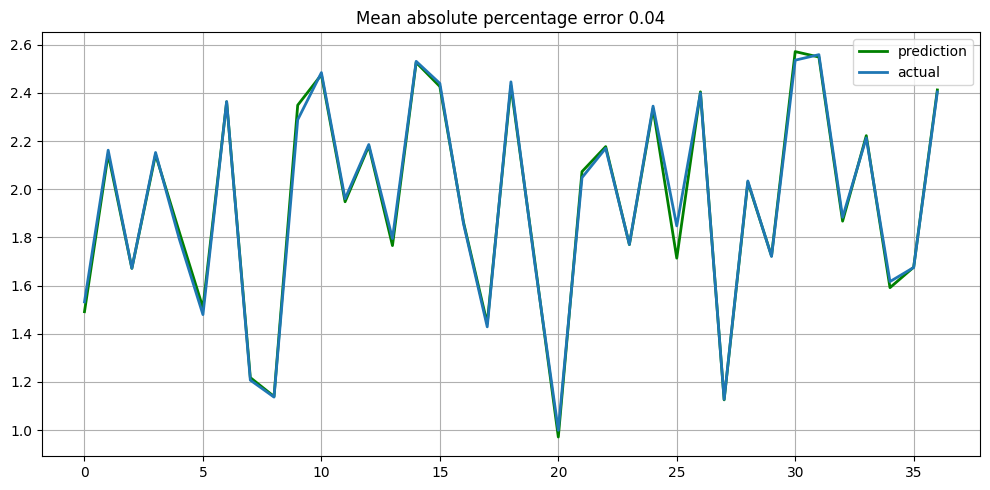

In [233]:
#checking the performance of the model
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(L_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(lasso_regressor, plot_intervals=True)

**ML Model 4**

**ElasticNet Regression with cross validation**

In [234]:
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [235]:
elasticnet.fit(x_train,y_train)

ElasticNet(alpha=0.1)

In [236]:
elasticnet.score(x_train, y_train)

0.6978243699335667

In [237]:
y_pred_en = elasticnet.predict(x_test)

In [238]:
MSE  = mean_squared_error(10**(y_test), 10**(y_pred_en))
print("MSE :" , MSE)

MAE=mean_absolute_error(10**(y_test), 10**(y_pred_en))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_en))
print("MAPE :" ,MAPE)

r2 = r2_score(10**(y_test), 10**(y_pred_en))
print("R2 :" ,r2)

MSE : 8197.994787560963
MAE : 60.57721715145328
RMSE : 90.54277877092663
MAPE : 0.44832193471670617
R2 : 0.27167148105712235


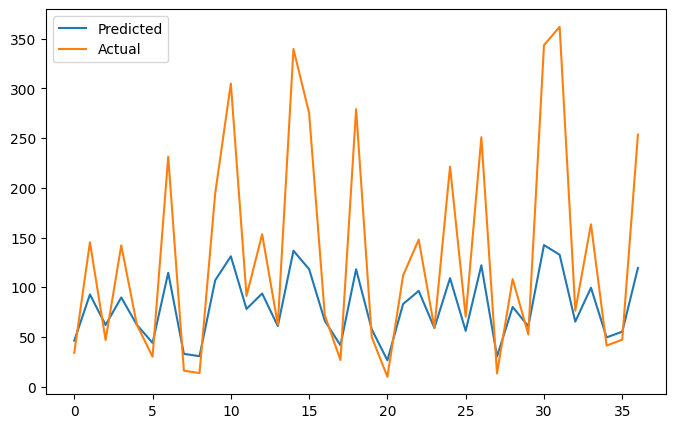

In [239]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_en))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [240]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [241]:
y_pred_elastic = elastic_regressor.predict(x_test)

In [242]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.3}

Using  {'alpha': 0.0001, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.001141505075457148


In [243]:
E_MSE  = mean_squared_error(10**(y_test), 10**(y_pred_elastic))
print("MSE :" , E_MSE)

E_MAE=mean_absolute_error(10**(y_test), 10**(y_pred_elastic))
print("MAE :" ,MAE)

E_RMSE = np.sqrt(E_MSE)
print("RMSE :" ,E_RMSE)

E_MAPE=mean_absolute_percentage_error(10**(y_test), 10**(y_pred_elastic))
print("MAPE :" ,E_MAPE)

E_r2 = r2_score(10**(y_test), 10**(y_pred_elastic))
print("R2 :" ,E_r2)

MSE : 72.58175601534316
MAE : 60.57721715145328
RMSE : 8.519492708802746
MAPE : 0.040394748815321575
R2 : 0.9935516715695966


In [244]:
# Visualizing evaluation Metric Score chart
Matrics_score_elastic=pd.DataFrame({'mean squared error':[E_MSE],'root mean squared error':[E_RMSE],'mean absolute error':[E_MAE], 'mean absolute percentage error':[E_MAPE], 'r2_score':[E_r2]})

In [245]:
Matrics_score_elastic

,mean squared error,root mean squared error,mean absolute error,mean absolute percentage error,r2_score
0,72.581756,8.519493,5.04725,0.040395,0.993552


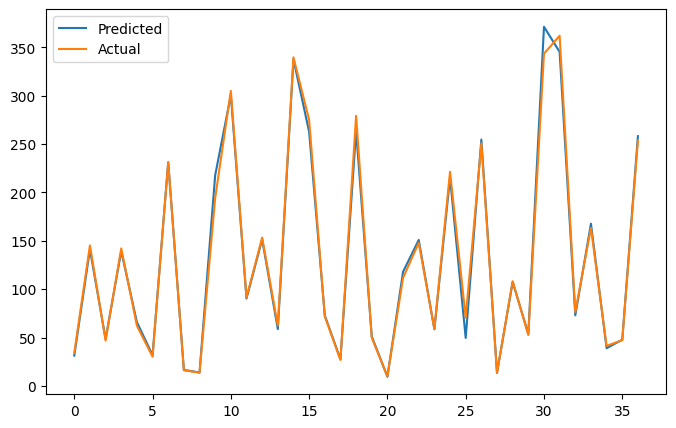

In [246]:
plt.figure(figsize=(8,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [247]:
# check for Homoscadacity
fig=px.scatter(x=10**(y_test),y=10**(y_pred_elastic), labels= {'x': 'Actual_value', 'y':'prediction'})
fig.add_shape(type='line', line=dict(dash='dash'),x0=y.min(),y0=y.min(),x1=y.max(),y1=y.max())
fig.show()

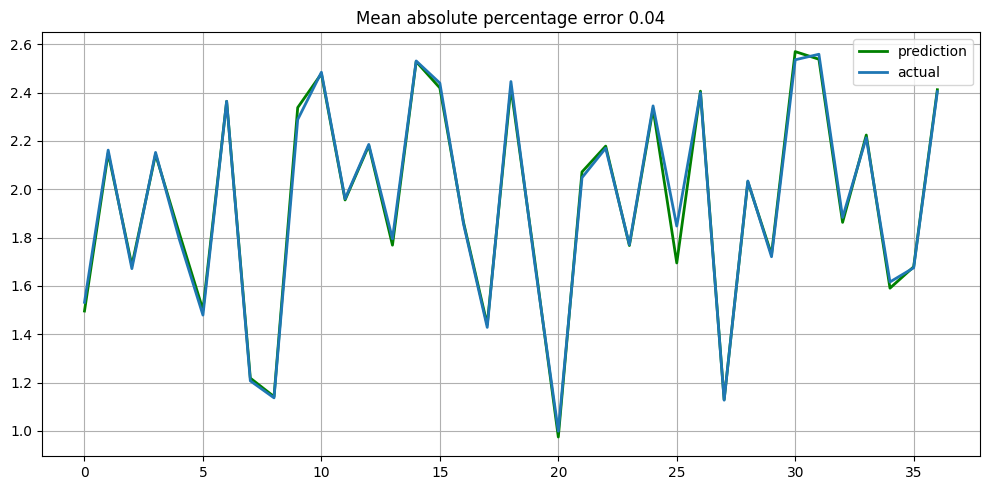

In [248]:
#checking the performance of the model
def plotModelResults(model, X_train=x_train, X_test=x_test, plot_intervals=False):

    #Plots modelled vs fact values


    prediction = model.predict(x_test)

    plt.figure(figsize=(10, 5))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test, label="actual", linewidth=2.0)


    plt.title("Mean absolute percentage error {0:.2f}".format(E_MAPE))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);

plotModelResults(elastic_regressor, plot_intervals=True)

**Evaluation metric Summary**

In [249]:
model_report = pd.DataFrame(data={'model':['linear regression','ridge regression','lasso regression','elastic net regression'], 'mae':[Lr_MAE,R_MAE,L_MAE,E_MAE], 'mse':[Lr_MSE,R_MSE,L_MSE,E_MSE],'rmse':[Lr_RMSE,R_RMSE,L_RMSE,E_RMSE],'r2_score':[Lr_R2_score,L_r2,R_r2,E_r2],'mape':[Lr_MAPE,R_MAPE,L_MAPE,E_MAPE]})
model_report

,model,mae,mse,rmse,r2_score,mape
0,linear regression,4.746994,69.929765,8.362402,0.994667,0.041510
1,ridge regression,4.931169,70.907808,8.420677,0.993813,0.039993
2,lasso regression,4.770111,69.641114,8.345125,0.993700,0.038945
3,elastic net regression,5.047250,72.581756,8.519493,0.993552,0.040395


**ML Model 5**

**Randomforest Regression**

In [250]:
Regressor = RandomForestRegressor()
grid_values = {'n_estimators':[100, 150,  200], 'max_depth':[20,30, 50, 100]}
Regressor = GridSearchCV(Regressor, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Fit the object to train dataset
Regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 30, 50, 100],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc')

In [251]:
print(f'Best parameters: {Regressor.best_params_}')


Best parameters: {'max_depth': 20, 'n_estimators': 100}


In [252]:
train_preds =  Regressor.predict(x_train)
test_preds  = Regressor.predict(x_test)

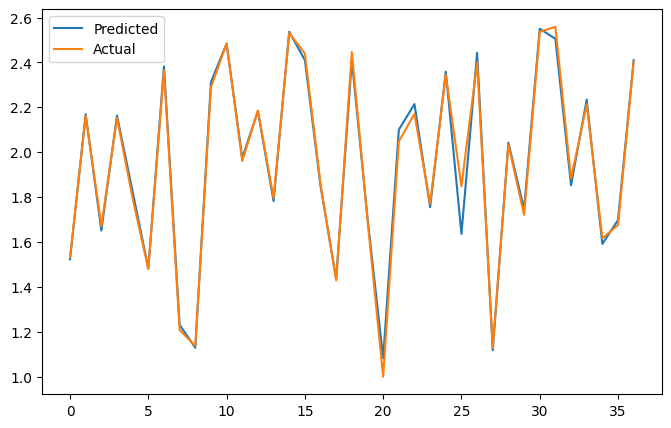

In [253]:
plt.figure(figsize=(8,5))
plt.plot(test_preds)
plt.plot(y_test)
plt.legend(["Predicted","Actual"])
plt.show()

##### Which hyperparameter optimization technique have you used and why?


For all models, I utilized the Grid Search Cross Validation (Grid Search CV) technique since the hyperparameter values were already known, and the dataset size was relatively small. Based on this context, I determined that Grid Search CV would be the most appropriate method

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying Grid Search CV for each model, there was a notable improvement in performance. For instance, in the case of Lasso regression, the evaluation metric of Mean Absolute Percentage Error (MAPE) was initially 0.7547 before cross-validation. However, after employing cross-validation, the MAPE for the test data improved significantly to 0.0409. This demonstrates that cross-validation enhanced the model's performance, which is also evident from the plots provided above.

### Which Evaluation metrics did you consider for a positive business impact and why?


Since this is a regression problem, I opted to use the Root Mean Square Error (RMSE) as the evaluation metric for its positive impact on business outcomes. RMSE not only measures the difference between the actual and predicted values but also highlights the influence of large errors, making it particularly useful for understanding the magnitude of prediction errors and their impact.

### Which ML model did you choose from the above created models as your final prediction model and why?

From the results of the models above, the evaluation metrics for the Lasso and ElasticNet regressions on the test dataset are quite similar. Based on this, it seems reasonable to use the ElasticNet regressor for now. However, it is still premature to select a definitive model given the small size of the dataset. More data would provide additional training samples, allowing the algorithms to learn more effectively and improve their accuracy.

# **Conclusion**

- The dataset does not contain any null, missing, or duplicate values, which made the data analysis smooth and straightforward.  
- I began with univariate analysis, where it was evident that all variables exhibited positive skewness.  
- In the bivariate analysis section, I observed that all the independent variables displayed a linear relationship with the dependent variable.  
- When analyzing the closing price with respect to the date, a significant drop in stock prices was apparent after 2018.  
- The correlation heatmap revealed that all variables were highly correlated, which presents a challenge for linear regression due to multicollinearity.  
- In the box plot visualization, it was noted that the independent variables contained outliers.  
- Additionally, the date column was reformatted to the Year-Month-Date format.  
- To address the issues of outliers, skewness, and multicollinearity, the data was transformed using a log10 scale, and a new feature representing the average (mean of the prices for each row) was created.  
- Finally, I implemented five models to predict the closing stock prices and determined that the Elastic Net regression model performed best, with a superior R² score and strong values for other evaluation metrics.  













### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***